In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
url='/content/gdrive/MyDrive/Submissions/customer_churn_large_dataset.xlsx'
data=pd.read_excel(url)

print(data.shape)
data.head(3)

(100000, 9)


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0


In [4]:
data.tail(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99990,99991,Customer_99991,62,Male,Chicago,9,36.34,432,0
99991,99992,Customer_99992,55,Female,Miami,14,73.87,324,1
99992,99993,Customer_99993,44,Male,New York,18,45.87,229,0
99993,99994,Customer_99994,20,Female,Houston,15,84.72,312,1
99994,99995,Customer_99995,47,Female,Houston,8,34.58,200,0
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [5]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
data.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [9]:
new_data=data.drop(columns=['CustomerID','Name'])

print(new_data.shape)
new_data.head(3)

(100000, 7)


,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0


# EDA

Check NULL values

In [10]:
new_data.isna().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

There is no NULL values

In [11]:
#Check brief description of data
new_data.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


# Time to check for distribution of data

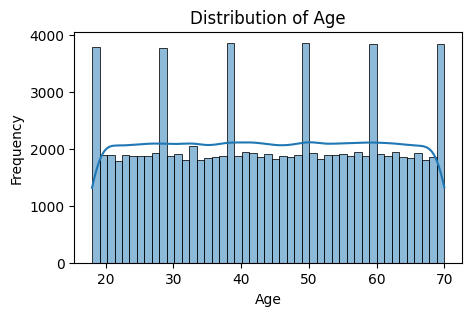

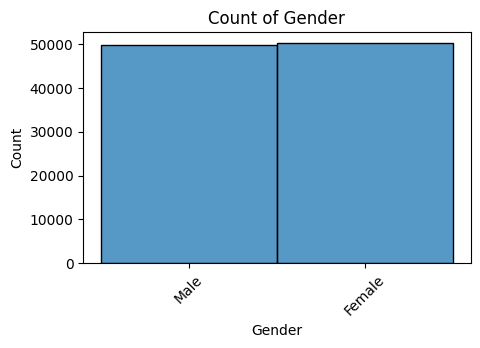

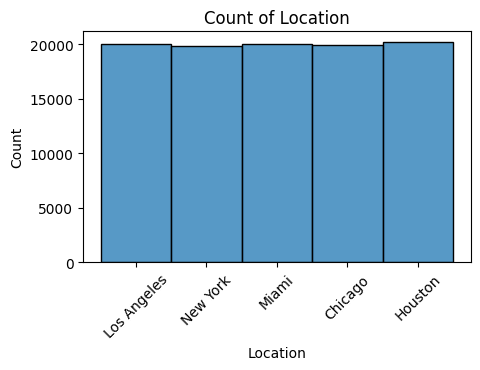

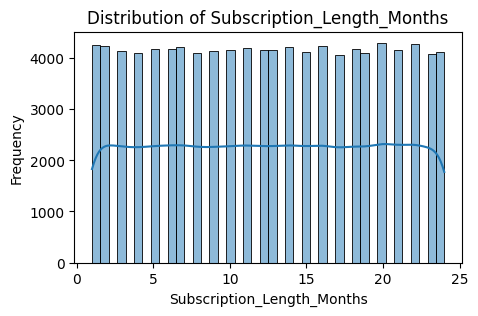

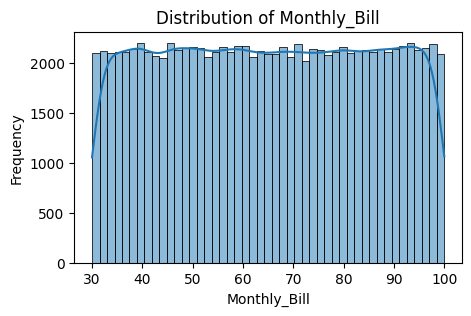

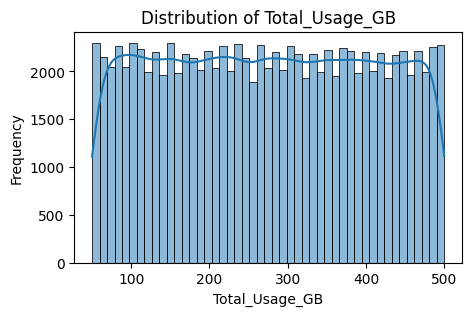

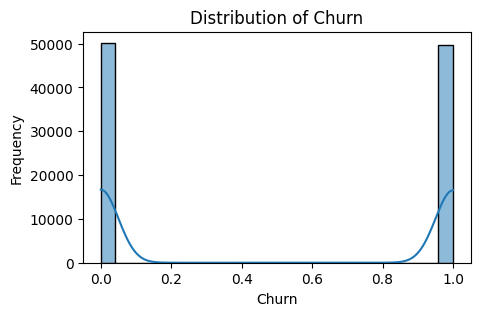

In [12]:
#Loop through each column
for column in new_data.columns:
  #Determine the data type of the column
  dtype=new_data[column].dtype

  #If the column is numerical, create a histogram
  if dtype in ['int64','float64']:
    plt.figure(figsize=(5,3))
    sns.histplot(new_data[column],kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

  #If the column is categorical, create a count plot
  elif dtype=='object':
    plt.figure(figsize=(5,3))
    sns.histplot(data=new_data,x=column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate

In [14]:
#Divide the data in `features` and `target`
X=new_data.iloc[:,:-1]
y=new_data.iloc[:,-1]

In [15]:
#Divide the data in training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42,shuffle=True)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((90000, 6), (10000, 6), (90000,), (10000,))

In [16]:
# Differentiate `Categorical` and `Numerical` features
categorical_features=['Gender','Location']
numerical_features=['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']

# Create `StandardScaler` and `OneHotEncoder` object
one_hot_encoder=OneHotEncoder()
standard_scaler=StandardScaler()

# Create ColumnTransformer Object for `Preprocessing Stuff`
preprocessor=ColumnTransformer(transformers=(
    ('encode_gender',one_hot_encoder,categorical_features),
    ('standardization',standard_scaler,numerical_features)
))

# Logistic Regression

In [17]:
# Create `Model Pipeline` for Logistic Regression
clf=Pipeline(steps=(
    ('preprocessing',preprocessor),
    ('classifier',LogisticRegression())
))

clf.fit(X_train,y_train)
print("Accuracy score of Logistic Regression is: ",clf.score(X_test,y_test))

# Check score using other metrics like 'Precision Score', 'Recall Score' , 'F1 Score'
y_pred=clf.predict(X_test)

print("The precision score of Logistic Regression is: ",precision_score(y_test,y_pred))
print("The recall score of Logistic Regression is: ",recall_score(y_test,y_pred))
print("The F1 score of Logistic Regression is: ",f1_score(y_test,y_pred))

Accuracy score of Logistic Regression is:  0.4994
The precision score of Logistic Regression is:  0.4985514880168554
The recall score of Logistic Regression is:  0.378978978978979
The F1 score of Logistic Regression is:  0.4306187443130118


# KNeighbors Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# Create `Model Pipeline` for KNeighborsClassifier
clf1=Pipeline(steps=(
    ('preprocessing',preprocessor),
    ('classifier',KNeighborsClassifier())
))

clf1.fit(X_train,y_train)
print("Accuracy score of Logistic Regression is: ",clf1.score(X_test,y_test))

# Check score using other metrics like 'Precision Score', 'Recall Score' , 'F1 Score'
y_pred=clf1.predict(X_test)

print("The precision score of KNeighbors Classifier is: ",precision_score(y_test,y_pred))
print("The recall score of KNeighbors Classifier is: ",recall_score(y_test,y_pred))
print("The F1 score of KNeighbors Classifier is: ",f1_score(y_test,y_pred))

Accuracy score of Logistic Regression is:  0.5015
The precision score of KNeighbors Classifier is:  0.501025430680886
The recall score of KNeighbors Classifier is:  0.4890890890890891
The F1 score of KNeighbors Classifier is:  0.49498531050552125


# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
# Create `Model Pipeline` for Naive Bayes
clf2=Pipeline(steps=(
    ('preprocessing',preprocessor),
    ('classifier',GaussianNB())
))

clf2.fit(X_train,y_train)
print("Accuracy score of GaussianNB is: ",clf2.score(X_test,y_test))

# Check score using other metrics like 'Precision Score', 'Recall Score' , 'F1 Score'
y_pred=clf2.predict(X_test)

print("The precision score of Naive Bayes is: ",precision_score(y_test,y_pred))
print("The recall score of Naive Bayes is: ",recall_score(y_test,y_pred))
print("The F1 score of Naive Bayes is: ",f1_score(y_test,y_pred))

Accuracy score of GaussianNB is:  0.502
The precision score of Naive Bayes is:  0.501835086860778
The recall score of Naive Bayes is:  0.4106106106106106
The F1 score of Naive Bayes is:  0.45166262937678925


# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
# Create `Model Pipeline` for Decision Tree Classifier
clf3=Pipeline(steps=(
    ('preprocessing',preprocessor),
    ('classifier',DecisionTreeClassifier())
))

clf3.fit(X_train,y_train)
print("Accuracy score of Decision Tree Classifier is: ",clf.score(X_test,y_test))

# Check score using other metrics like 'Precision Score', 'Recall Score' , 'F1 Score'
y_pred=clf3.predict(X_test)

print("The precision score of Decision Tree Classifier is: ",precision_score(y_test,y_pred))
print("The recall score of Decision Tree Classifier is: ",recall_score(y_test,y_pred))
print("The F1 score of Decision Tree Classifier is: ",f1_score(y_test,y_pred))

Accuracy score of Decision Tree Classifier is:  0.4994
The precision score of Decision Tree Classifier is:  0.49715099715099714
The recall score of Decision Tree Classifier is:  0.4890890890890891
The F1 score of Decision Tree Classifier is:  0.49308709254213345


In [21]:
# Create `Model Pipeline` for Random Forest Classifier
clf4=Pipeline(steps=(
    ('preprocessing',preprocessor),
    ('classifier',RandomForestClassifier())
))

clf4.fit(X_train,y_train)
print("Accuracy score of Random Forest Classifier is: ",clf4.score(X_test,y_test))

# Check score using other metrics like 'Precision Score', 'Recall Score' , 'F1 Score'
y_pred=clf4.predict(X_test)

print("The precision score of Random Forest Classifier is: ",precision_score(y_test,y_pred))
print("The recall score of Random Forest Classifier is: ",recall_score(y_test,y_pred))
print("The F1 score of Random Forest Classifier is: ",f1_score(y_test,y_pred))

Accuracy score of Random Forest Classifier is:  0.488
The precision score of Random Forest Classifier is:  0.4866766147942869
The recall score of Random Forest Classifier is:  0.45705705705705707
The F1 score of Random Forest Classifier is:  0.4714020235391286


# Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
# Create `Model Pipeline` for Gradient Boosting Classifier
clf5=Pipeline(steps=(
    ('preprocessing',preprocessor),
    ('classifier',GradientBoostingClassifier())
))

clf5.fit(X_train,y_train)
print("Accuracy score of Gradient Boosting Classifier is: ",clf5.score(X_test,y_test))

# Check score using other metrics like 'Precision Score', 'Recall Score' , 'F1 Score'
y_pred=clf5.predict(X_test)

print("The precision score of Gradient Boosting Classifier is: ",precision_score(y_test,y_pred))
print("The recall score of Gradient Boosting Classifier is: ",recall_score(y_test,y_pred))
print("The F1 score of Gradient Boosting Classifier is: ",f1_score(y_test,y_pred))

Accuracy score of Gradient Boosting Classifier is:  0.5004
The precision score of Gradient Boosting Classifier is:  0.4998771196854264
The recall score of Gradient Boosting Classifier is:  0.4072072072072072
The F1 score of Gradient Boosting Classifier is:  0.44880847308031774


# My model

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
# Create `Features` and `Targets`
features=preprocessor.fit_transform(X_train)
targets=y_train

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Activation,LeakyReLU

In [26]:
# Create Model using `Sequential` layer
model=keras.Sequential(layers=[
    keras.layers.Dense(1024,activation="relu", input_shape=(features.shape[1], )),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    # keras.layers.Dense(64, activation="relu"),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.1),

    # keras.layers.Dense(128, activation="relu"),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.1),

    # keras.layers.Dense(128, activation="relu"),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.1),

    # keras.layers.Dense(256, activation="relu"),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.1),

    # keras.layers.Dense(256, activation="relu"),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.1),

    # keras.layers.Dense(512, activation="relu"),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.1),

    # keras.layers.Dense(512, activation="relu"),
    # keras.layers.BatchNormalization(),
    # keras.layers.Dropout(0.1),

    keras.layers.Dense(1024, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(256, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(256, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              12288     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0

In [27]:
model.fit(x=features,y=targets,batch_size=1000,epochs=100,validation_split=0.2)

Epoch 1/100
72/72 [==============================] - 11s 23ms/step - loss: 0.7692 - accuracy: 0.4966 - val_loss: 0.6931 - val_accuracy: 0.5016
Epoch 2/100
72/72 [==============================] - 1s 16ms/step - loss: 0.7165 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4981
Epoch 3/100
72/72 [==============================] - 1s 21ms/step - loss: 0.7086 - accuracy: 0.5016 - val_loss: 0.6936 - val_accuracy: 0.4984
Epoch 4/100
72/72 [==============================] - 1s 16ms/step - loss: 0.7041 - accuracy: 0.5026 - val_loss: 0.6953 - val_accuracy: 0.4957
Epoch 5/100
72/72 [==============================] - 1s 16ms/step - loss: 0.7020 - accuracy: 0.5020 - val_loss: 0.6939 - val_accuracy: 0.4952
Epoch 6/100
72/72 [==============================] - 1s 13ms/step - loss: 0.6993 - accuracy: 0.5067 - val_loss: 0.6939 - val_accuracy: 0.4985
Epoch 7/100
72/72 [==============================] - 1s 11ms/step - loss: 0.6984 - accuracy: 0.5021 - val_loss: 0.6940 - val_accuracy: 0.5014
Epoch

In [28]:
test_features=preprocessor.transform(X_test)
test_targets=y_test

model.evaluate(test_features,test_targets)

313/313 [==============================] - 1s 3ms/step - loss: 0.7080 - accuracy: 0.5055


[0.707985520362854, 0.5055000185966492]